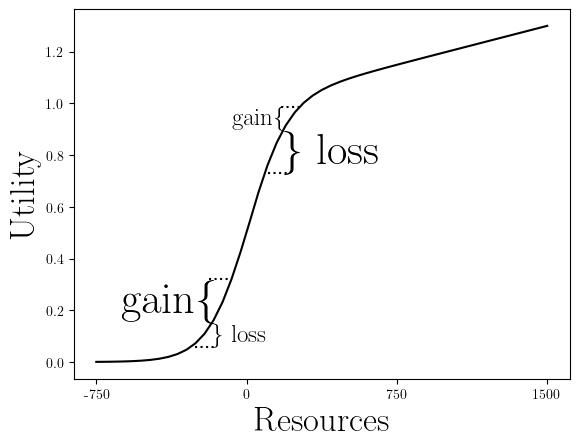

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
from matplotlib import rcParams
rc('text', usetex=True)
rcParams['font.family'] = 'garamond'

X = np.linspace(-7.5,15,51)
utility = [1/(1+np.exp(-x)) + (x>0)*x/50 for x in X]
plt.plot(utility,color="black")
plt.xlabel("Resources",fontsize=25)
plt.ylabel("Utility",fontsize=25)
plt.plot([12.5,15],[.32,.32],':',color="black")
plt.plot([11,13.4],[.06,.06],':',color="black")
plt.annotate(r"gain$\{$",fontsize=32,
            xy=(2.7, 0.195))
plt.annotate(r"$\}$ loss",fontsize=18,
            xy=(12.8, 0.08))

plt.annotate(r"gain$\{$",fontsize=18,
            xy=(15, 0.92))
plt.annotate(r"$\}$ loss",fontsize=32,
            xy=(20.8, 0.77))
plt.xticks([0,50/3,100/3,50],[-750,0,750,1500])

plt.plot([20.5,22.5],[.987,.987],':',color="black")
plt.plot([19,21.5],[.73,.73],':',color="black")
plt.savefig("images/utility.png",dpi=200)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 746.48it/s]


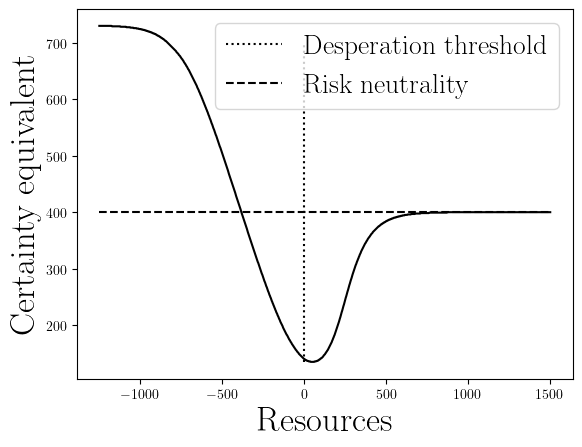

In [5]:
## import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from tqdm import tqdm
X = np.linspace(-12.5,15,1000)
def utility(x):
    #return x/500+1/(1+np.exp(-x))
    #return x/5 + 10*(x>0)
    return 1/(1+np.exp(-x))+(x>0)*x/50
    #return 1*(x>0)

#safety_equivalent = [1,2,3,4,5,6,7]
safety_equivalent = np.linspace(0,8,1000)
preferred_risk = []
for x in tqdm(X):
    utility_variance = [] 
    expected_utilities = np.array([utility(x+v) for v in safety_equivalent])
    z = np.where(expected_utilities > .5*utility(x+8) + .5*utility(x))[0]
    if(len(z)>0):
        preferred_risk.append(safety_equivalent[z[0]])
    else:preferred_risk.append(7)
    

    
preferred_risk = np.array(preferred_risk)*100
X = X*100

plt.plot(X,preferred_risk,color="black")
plt.plot([0,0],[min(preferred_risk),700],":",label="Desperation threshold",color="black")
plt.plot([min(X),max(X)],[400,400],"--",label="Risk neutrality",color="black")
plt.legend(fontsize=20)
plt.xlabel("Resources",fontsize=25)
plt.ylabel("Certainty equivalent",fontsize=25)
plt.savefig("images/prediction_v.png",dpi=200)

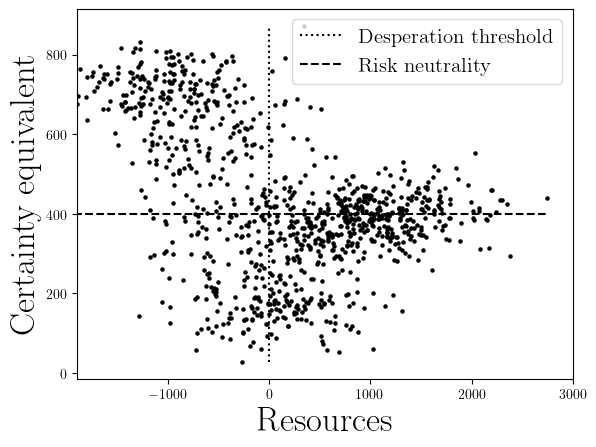

In [7]:
X_noisy = X+np.random.normal(size=len(X),scale=500)
preferred_risk_noisy = preferred_risk+np.random.normal(size=len(X),scale=50)
plt.scatter(X_noisy,preferred_risk_noisy,color="black",s=5)
plt.plot([0,0],[min(preferred_risk_noisy),max(preferred_risk_noisy)],":",label="Desperation threshold",color="black")
plt.plot([min(X_noisy),max(X_noisy)],[400,400],"--",label="Risk neutrality",color="black")
plt.legend(fontsize=15)
plt.xlabel("Resources",fontsize=25)
plt.xlim((-1900,3000))
plt.ylabel("Certainty equivalent",fontsize=25)
plt.savefig("images/prediction_noisy.jpg",dpi=200)